<a href="https://colab.research.google.com/github/helah20/Machine_learning/blob/main/Churnc_of_Copy_of_02_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group members:**

- Shaikha AlBilais

- Rahaf Shiqdar

- Hailah AlHarthi

# Logistic Regression Assignment

#### Dataset Options
1. Dog or horse
    - `https://github.com/gumdropsteve/datasets/raw/master/dog_or_horse.csv`
    - Note: target variable is `target`.
2. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target variable is `Churn`


1. Load in your dataset through its CSV link.

In [407]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *




In [408]:
df=pd.read_csv('https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv')

2. Find out some information about the data...

In [409]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No


In [410]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No
6337,1775-KWJKQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.85,6562.9,No


In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [412]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
315,7901-TBKJX,Male,1,No,No,56,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.05,5594,No


In [413]:
df.shape

(6338, 21)

In [414]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     5087-SUURX  Female              0  ...          39.05       669.85    Yes
1     1764-VUUMT    Male              0  ...          19.95       1269.1     No
2     0089-IIQKO  Female              0  ...          99.95       3767.4     No
3     1960-UYCNN    Male              0  ...          95.25      1021.55     No
4     8224-IVVPA  Female              0  ...          56.70      1652.95     No
...          ...     ...            ...  ...            ...          ...    ...
6333  5119-KEPFY    Male              0  ...          95.00      3440.25     No
6334  6923-JHPMP  Female              0  ...          80.45        137.1     No
6335  9924-JPRMC    Male              0  ...         118.20      8547.15     No
6336  4098-NAUKP    Male              1  ...          84.65       5683.6     No
6337  1775-KWJKQ    Male              0  ...          89.85       6562.9     No

[6338

In [415]:
# Identify if there is any missing values

df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [416]:
df.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
9995-HOTOH  Male    0              Yes      Yes         63      No            No phone service  DSL              Yes                  Yes                  Yes                  No                   Yes                  Yes                  Two year        No                Electronic check           59.00           3707.6        No       1
3374-TTZTK  Male    0              Yes      No          52      Yes           No                Fiber optic      Yes                  Yes                  Yes                  Yes                  Yes                  Yes                  Two year        Yes               Electronic check           106.30          5487   

In [417]:
df.gender.value_counts()

Male      3197
Female    3141
Name: gender, dtype: int64

In [418]:
df.Churn.value_counts()

No     4650
Yes    1688
Name: Churn, dtype: int64

In [419]:
df.SeniorCitizen.value_counts()

0    5313
1    1025
Name: SeniorCitizen, dtype: int64

In [420]:
df.Partner.value_counts()

No     3267
Yes    3071
Name: Partner, dtype: int64

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualization(s) (of your choice)

In [421]:
corr=df.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.020302,0.216512
tenure,0.020302,1.000000,0.253420
MonthlyCharges,0.216512,0.253420,1.000000


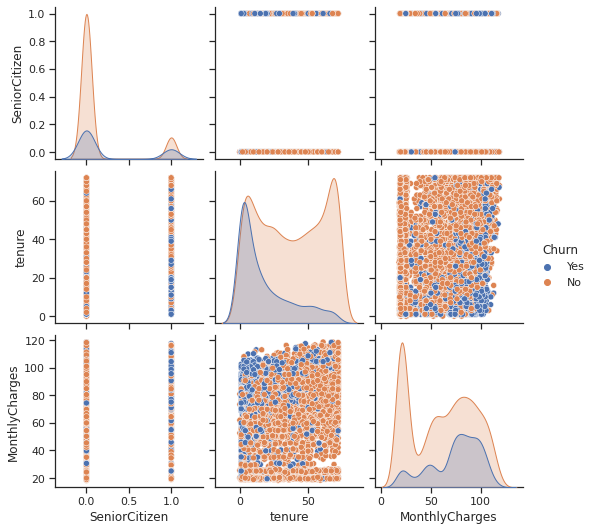

In [422]:
sns.pairplot(df, hue='Churn')


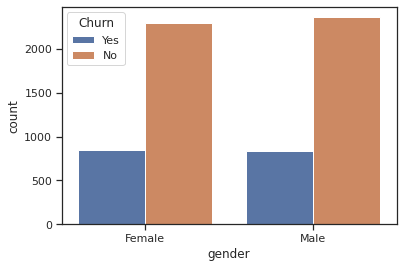

In [423]:
sns.countplot(x ='gender', hue='Churn', data=df)

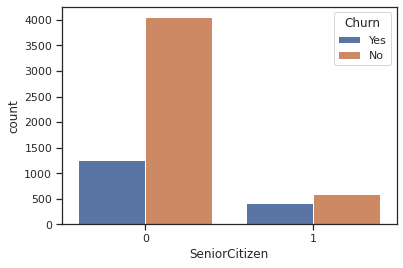

In [424]:
sns.countplot(x ='SeniorCitizen', hue='Churn', data=df)

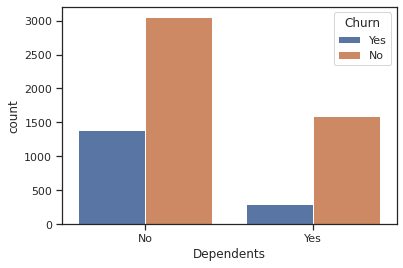

In [425]:
sns.countplot(x ='Dependents', hue='Churn', data=df)

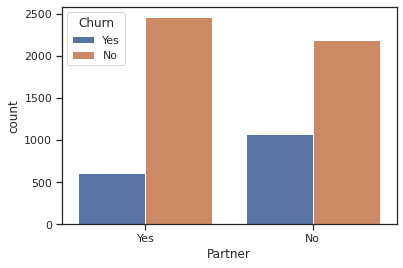

In [426]:
sns.countplot(x ='Partner', hue='Churn', data=df)

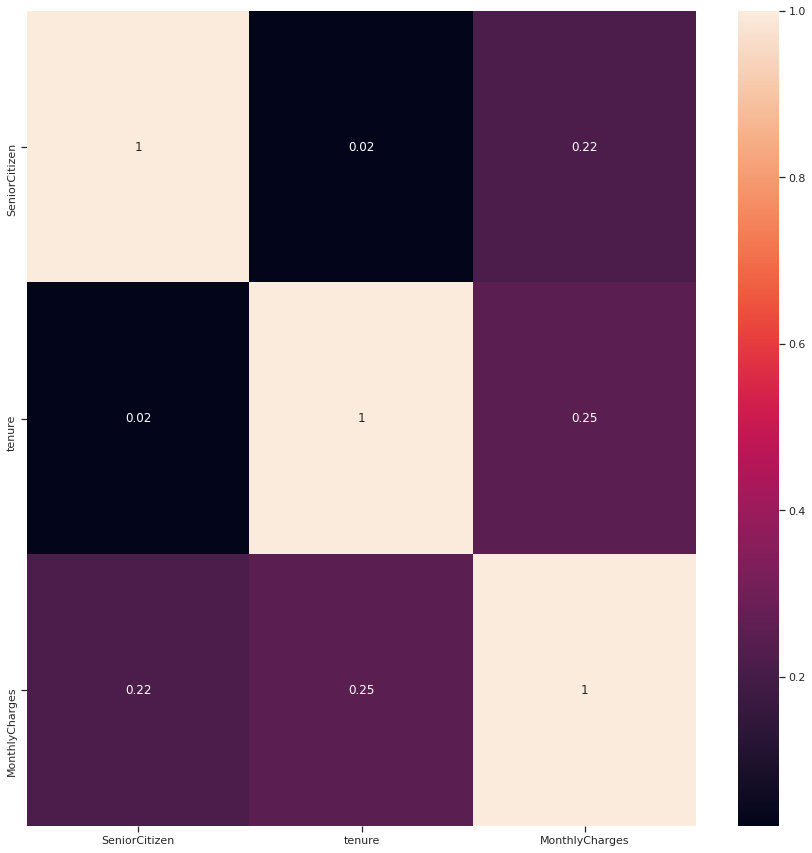

In [427]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [428]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Data Wrangling:**

In [429]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0016-QLJIS,customerID_0017-DINOC,customerID_0018-NYROU,customerID_0019-EFAEP,customerID_0019-GFNTW,customerID_0020-INWCK,customerID_0020-JDNXP,customerID_0022-TCJCI,customerID_0023-HGHWL,customerID_0023-UYUPN,customerID_0023-XUOPT,customerID_0027-KWYKW,customerID_0030-FNXPP,customerID_0031-PVLZI,customerID_0032-PGELS,customerID_0036-IHMOT,customerID_0040-HALCW,customerID_0042-JVWOJ,customerID_0042-RLHYP,customerID_0048-LUMLS,customerID_0048-PIHNL,customerID_0052-DCKON,customerID_0052-YNYOT,customerID_0056-EPFBG,customerID_0057-QBUQH,customerID_0058-EVZWM,customerID_0060-FUALY,customerID_0064-SUDOG,customerID_0064-YIJGF,...,TotalCharges_971.3,TotalCharges_973.25,TotalCharges_973.35,TotalCharges_973.45,TotalCharges_973.55,TotalCharges_973.65,TotalCharges_973.95,TotalCharges_978,TotalCharges_978.6,TotalCharges_979.05,TotalCharges_98.35,TotalCharges_98.5,TotalCharges_981.45,TotalCharges_982.95,TotalCharges_985.05,TotalCharges_987.95,TotalCharges_989.05,TotalCharges_989.45,TotalCharges_99.45,TotalCharges_99.6,TotalCharges_99.75,TotalCharges_99.95,TotalCharges_990.3,TotalCharges_990.45,TotalCharges_990.85,TotalCharges_990.9,TotalCharges_992.7,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_995.35,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,0,18,39.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,66,19.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,39,99.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,10,95.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,27,56.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [430]:
#Get Correlation of "Churn" with other variables:
# plt.figure(figsize=(15,8))
# df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar') #   take alot of time 

In [431]:
df.drop(df.loc[df['TotalCharges']==' '].index, inplace=True)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])


In [432]:
df["Churn"] = df["Churn"].replace({'Yes':1,'No':0})
df["gender"]=df["gender"].replace({'Female':1,'Male':0})

In [433]:
dum=pd.get_dummies(df.iloc[:,1:20])
dum


,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,18,39.05,669.85,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0,66,19.95,1269.10,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1,0,39,99.95,3767.40,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
3,0,0,10,95.25,1021.55,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,1,0,27,56.70,1652.95,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,0,36,95.00,3440.25,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
6334,1,0,2,80.45,137.10,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
6335,0,0,72,118.20,8547.15,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
6336,0,1,68,84.65,5683.60,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


4. Split your data into training and testing datasets...

In [434]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [435]:
from sklearn.model_selection import train_test_split

# defind the target and the input data from featur engeneer 
X = df.tenure
y = df.Churn.astype('int')


 # split the data  into train set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=7)

5. Import, create, and fit a LogisticRegression model with 1 variable

In [436]:
from sklearn.linear_model import LogisticRegression # 1- initialze the model

lr = LogisticRegression()

In [437]:
lr.fit(pd.DataFrame(X_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [438]:
# Predict for training set
y_train_predict = lr.predict(pd.DataFrame(X_train))

y_train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [439]:
# Predict for training set
y_test_predict  = lr.predict(pd.DataFrame(X_test))


In [440]:
# what do they look like? (show me some of the predictions)
y_test_predict

array([0, 0, 0, ..., 0, 0, 0])

7. Score your model...
- accuracy_score
- confusion_matrix

In [441]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predict )


0.7381516587677726

In [442]:
from sklearn.metrics import r2_score
y_true=y_test
y_pred=y_test_predict

r2  = r2_score(y_true, y_pred)
r2

-0.3547351524879614

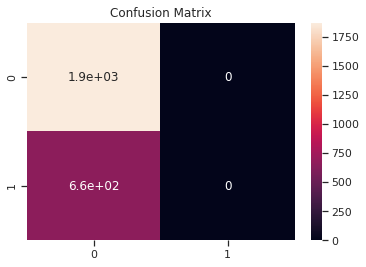

In [443]:
con = lr.predict(pd.DataFrame(X_test))
cf = confusion_matrix(y_test, con)
sns.heatmap(cf, annot=True).set_title("Confusion Matrix");


8. Create, and fit a LogisticRegression model with **more than** 1 variable

In [445]:
X=dum
y=df.Churn



X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)


In [446]:

lr2 = LogisticRegression()

In [447]:
lr2.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

9. Make predictions on your `X_test` values...

In [448]:
# Predict for training set
y_train_predict2 = lr2.predict(X_train)

y_train_predict2

array([0, 0, 0, ..., 1, 0, 1])

In [449]:
y_test_predict2  = lr2.predict(X_test)
y_test_predict2

array([0, 0, 0, ..., 0, 1, 0])

In [450]:
# what do they look like? (show me some of the predictions)
y_test_predict[1:5]

array([0, 0, 0, 0])

10. Score your model...
- accuracy_score
- confusion_matrix

In [451]:
accuracy_score(y_test,y_test_predict2 )

0.7898894154818326

In [452]:
from sklearn.metrics import r2_score
y_true=y_test
y_pred=y_test_predict2

r2  = r2_score(y_true, y_pred)
r2

-0.06960996061491564

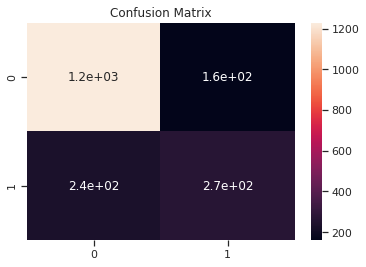

In [453]:
con = lr2.predict(X_test)
cf = confusion_matrix(y_test, con)
sns.heatmap(cf, annot=True).set_title("Confusion Matrix");

11. Which model is better? Why?

When we did the comparison between the false positive in both models, we found that in 1st model the false positive chances are hiegher than the 2nd modele chances , so we obtain that when we use multiple featuer we got higher accuraty score 

12. Perform GridSearchCV with the better data

In [454]:
from sklearn.pipeline import make_pipeline

def LR(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))


In [455]:
from sklearn.model_selection import GridSearchCV

param_grid={ 'fit_intercept': [True, False],'solver': ['liblinear'],'max_iter': [10, 100, 250, 1000, 10000]}
LR =LogisticRegression()

grid =GridSearchCV(LR, param_grid, cv=7)






In [456]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

GridSearchCV(cv=7, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [10, 100, 250, 1000, 10000],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [457]:
grid.best_params_

{'fit_intercept': True, 'max_iter': 100, 'solver': 'liblinear'}

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [458]:

lr2 = LogisticRegression(fit_intercept= True, 
                        max_iter= 10 , 
                        solver='liblinear')

In [459]:
lr2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [460]:
lr2.predict(X_test)

array([1, 0, 0, ..., 1, 1, 0])

14. Score the new model... 
- r2_score
- some other metric of your choice

In [461]:
accuracy_score(y_test,y_test_predict2)

0.7898894154818326

In [462]:
from sklearn.metrics import r2_score
y_true=y_test
y_pred=y_test_predict2

r2  = r2_score(y_true, y_pred)
r2


-0.06960996061491564

Did the score change at all? Why?

no , it did not 

## Bonus
Set up a SGDClassifier, score it, etc... https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Note: you may need more or less code cells, but here's 5.

In [463]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=10000)

In [464]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [465]:
sgdc.predict(X_test)


array([1, 0, 0, ..., 0, 1, 0])

In [466]:
preds = sgdc.predict(X_test)

accuracy_score(y_test, preds)

0.7783043707214323

In [467]:
from sklearn.model_selection import GridSearchCV

param_dict = {'loss': ['log', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'max_iter': [10, 100, 250, 1000, 10000]}

sgdc = SGDClassifier()

grid = GridSearchCV(sgdc, param_dict)

In [468]:
grid.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'loss': ['log', 'huber', 'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [10, 100, 250, 1000, 10000]},


In [469]:
grid.best_params_


{'loss': 'log', 'max_iter': 100}

In [470]:
sgdc = SGDClassifier(loss='log', max_iter=1000)

In [471]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [472]:
preds = sgdc.predict(X_test)

accuracy_score(y_test, preds)

0.6045286993154292

In [473]:
from sklearn.metrics import r2_score
y_true=y_test
y_pred=y_test_predict2

r2  = r2_score(y_true, preds)
r2

-1.0132257654681744